In [1]:
#input necessary functions
import numpy as np
import numpy
import os
import pandas as pd
import xml.etree.ElementTree as ET
import csv
import random
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.plots import plot_convergence, plot_objective, plot_evaluations
from skopt.space import Real
from skopt.utils import use_named_args

In [2]:
#SUMO simulation function to generate the .net.xml file for input of sumo run with given green times (an array of green times of the different intersections) for SUMO run
def create_network_with_green_times(green_times):
    #sumo_config: route info to generate route file
    #green_times to generate net.xml file 

    
    green_time_1=green_times[0]
    green_time_2=green_times[1]
    green_time_3=green_times[2]

    net_str=f"""<?xml version="1.0" encoding="UTF-8"?>

<!-- generated on 2024-07-16 10:59:21 by Eclipse SUMO netedit Version 1.20.0
<configuration xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/neteditConfiguration.xsd">

    <input>
        <sumo-net-file value="/Users/jiaqiyu/Documents/Research 2024/bayesian_multi_intersections/3intersections_gt.net.xml"/>
    </input>

    <output>
        <output-file value="/Users/jiaqiyu/Documents/Research 2024/bayesian_multi_intersections/3intersections_gt.net.xml"/>
    </output>

    <processing>
        <geometry.min-radius.fix.railways value="false"/>
        <geometry.max-grade.fix value="false"/>
        <offset.disable-normalization value="true"/>
        <lefthand value="0"/>
    </processing>

    <junctions>
        <no-turnarounds value="true"/>
        <junctions.corner-detail value="5"/>
        <junctions.limit-turn-speed value="5.50"/>
        <rectangular-lane-cut value="0"/>
    </junctions>

    <pedestrian>
        <walkingareas value="0"/>
    </pedestrian>

</configuration>
-->

<net version="1.20" junctionCornerDetail="5" limitTurnSpeed="5.50" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/net_file.xsd">

    <location netOffset="0.00,0.00" convBoundary="-269.54,-119.08,318.71,173.15" origBoundary="-10000000000.00,-10000000000.00,10000000000.00,10000000000.00" projParameter="!"/>

    <edge id=":J2_0" function="internal">
        <lane id=":J2_0_0" index="0" speed="6.50" length="9.03" shape="-122.15,29.22 -122.51,26.77 -123.57,25.02 -125.33,23.99 -127.78,23.65"/>
    </edge>
    <edge id=":J2_1" function="internal">
        <lane id=":J2_1_0" index="0" speed="13.89" length="14.44" shape="-122.15,29.22 -122.15,14.78"/>
    </edge>
    <edge id=":J2_2" function="internal">
        <lane id=":J2_2_0" index="0" speed="8.00" length="4.10" shape="-122.15,29.22 -121.62,25.36 -121.51,25.19"/>
    </edge>
    <edge id=":J2_12" function="internal">
        <lane id=":J2_12_0" index="0" speed="8.00" length="10.11" shape="-121.51,25.19 -119.97,22.60 -117.22,20.95 -113.37,20.40"/>
    </edge>
    <edge id=":J2_3" function="internal">
        <lane id=":J2_3_0" index="0" speed="6.50" length="9.03" shape="-113.37,23.60 -115.82,23.95 -117.57,25.00 -118.61,26.75 -118.95,29.21"/>
    </edge>
    <edge id=":J2_4" function="internal">
        <lane id=":J2_4_0" index="0" speed="13.89" length="14.41" shape="-113.37,23.60 -127.78,23.65"/>
    </edge>
    <edge id=":J2_5" function="internal">
        <lane id=":J2_5_0" index="0" speed="7.99" length="4.04" shape="-113.37,23.60 -117.22,23.05 -117.35,22.97"/>
    </edge>
    <edge id=":J2_13" function="internal">
        <lane id=":J2_13_0" index="0" speed="7.99" length="10.17" shape="-117.35,22.97 -119.97,21.40 -121.62,18.64 -122.15,14.78"/>
    </edge>
    <edge id=":J2_6" function="internal">
        <lane id=":J2_6_0" index="0" speed="6.50" length="9.03" shape="-118.95,14.79 -118.61,17.25 -117.57,19.00 -115.82,20.05 -113.37,20.40"/>
    </edge>
    <edge id=":J2_7" function="internal">
        <lane id=":J2_7_0" index="0" speed="13.89" length="14.41" shape="-118.95,14.79 -118.95,29.21"/>
    </edge>
    <edge id=":J2_8" function="internal">
        <lane id=":J2_8_0" index="0" speed="8.04" length="4.04" shape="-118.95,14.79 -119.52,18.65 -119.59,18.78"/>
    </edge>
    <edge id=":J2_14" function="internal">
        <lane id=":J2_14_0" index="0" speed="8.04" length="10.18" shape="-119.59,18.78 -121.18,21.41 -123.93,23.07 -127.78,23.65"/>
    </edge>
    <edge id=":J2_9" function="internal">
        <lane id=":J2_9_0" index="0" speed="6.56" length="9.11" shape="-127.80,20.45 -125.34,20.08 -123.58,19.01 -122.51,17.25 -122.15,14.78"/>
    </edge>
    <edge id=":J2_10" function="internal">
        <lane id=":J2_10_0" index="0" speed="13.89" length="14.44" shape="-127.80,20.45 -113.37,20.40"/>
    </edge>
    <edge id=":J2_11" function="internal">
        <lane id=":J2_11_0" index="0" speed="8.00" length="4.10" shape="-127.80,20.45 -123.94,20.98 -123.77,21.08"/>
    </edge>
    <edge id=":J2_15" function="internal">
        <lane id=":J2_15_0" index="0" speed="8.00" length="10.11" shape="-123.77,21.08 -121.18,22.61 -119.52,25.35 -118.95,29.21"/>
    </edge>
    <edge id=":J3_0" function="internal">
        <lane id=":J3_0_0" index="0" speed="6.51" length="9.03" shape="31.15,29.20 30.80,26.75 29.75,25.00 28.00,23.95 25.55,23.60"/>
    </edge>
    <edge id=":J3_1" function="internal">
        <lane id=":J3_1_0" index="0" speed="13.89" length="14.44" shape="31.15,29.20 31.19,14.76"/>
    </edge>
    <edge id=":J3_2" function="internal">
        <lane id=":J3_2_0" index="0" speed="8.02" length="4.08" shape="31.15,29.20 31.70,25.35 31.80,25.18"/>
    </edge>
    <edge id=":J3_12" function="internal">
        <lane id=":J3_12_0" index="0" speed="8.02" length="10.14" shape="31.80,25.18 33.36,22.60 36.11,20.94 39.97,20.37"/>
    </edge>
    <edge id=":J3_3" function="internal">
        <lane id=":J3_3_0" index="0" speed="6.53" length="9.07" shape="39.99,23.57 37.52,23.93 35.76,24.99 34.70,26.75 34.35,29.20"/>
    </edge>
    <edge id=":J3_4" function="internal">
        <lane id=":J3_4_0" index="0" speed="13.89" length="14.44" shape="39.99,23.57 25.55,23.60"/>
    </edge>
    <edge id=":J3_5" function="internal">
        <lane id=":J3_5_0" index="0" speed="7.98" length="4.09" shape="39.99,23.57 36.12,23.04 35.96,22.94"/>
    </edge>
    <edge id=":J3_13" function="internal">
        <lane id=":J3_13_0" index="0" speed="7.98" length="10.14" shape="35.96,22.94 33.36,21.39 31.72,18.63 31.19,14.76"/>
    </edge>
    <edge id=":J3_6" function="internal">
        <lane id=":J3_6_0" index="0" speed="6.49" length="9.03" shape="34.39,14.78 34.73,17.23 35.77,18.99 37.52,20.03 39.97,20.37"/>
    </edge>
    <edge id=":J3_7" function="internal">
        <lane id=":J3_7_0" index="0" speed="13.89" length="14.42" shape="34.39,14.78 34.35,29.20"/>
    </edge>
    <edge id=":J3_8" function="internal">
        <lane id=":J3_8_0" index="0" speed="8.03" length="4.06" shape="34.39,14.78 33.82,18.64 33.74,18.77"/>
    </edge>
    <edge id=":J3_14" function="internal">
        <lane id=":J3_14_0" index="0" speed="8.03" length="10.16" shape="33.74,18.77 32.16,21.39 29.40,23.05 25.55,23.60"/>
    </edge>
    <edge id=":J3_9" function="internal">
        <lane id=":J3_9_0" index="0" speed="6.54" length="9.09" shape="25.55,20.40 28.01,20.05 29.77,18.99 30.83,17.23 31.19,14.76"/>
    </edge>
    <edge id=":J3_10" function="internal">
        <lane id=":J3_10_0" index="0" speed="13.89" length="14.42" shape="25.55,20.40 39.97,20.37"/>
    </edge>
    <edge id=":J3_11" function="internal">
        <lane id=":J3_11_0" index="0" speed="8.00" length="4.05" shape="25.55,20.40 29.40,20.95 29.54,21.03"/>
    </edge>
    <edge id=":J3_15" function="internal">
        <lane id=":J3_15_0" index="0" speed="8.00" length="10.14" shape="29.54,21.03 32.15,22.60 33.80,25.35 34.35,29.20"/>
    </edge>
    <edge id=":J4_0" function="internal">
        <lane id=":J4_0_0" index="0" speed="6.55" length="9.09" shape="183.74,28.70 183.36,26.24 182.29,24.48 180.52,23.43 178.07,23.09"/>
    </edge>
    <edge id=":J4_1" function="internal">
        <lane id=":J4_1_0" index="0" speed="13.89" length="14.46" shape="183.74,28.70 183.65,14.24"/>
    </edge>
    <edge id=":J4_2" function="internal">
        <lane id=":J4_2_0" index="0" speed="7.99" length="4.12" shape="183.74,28.70 184.24,24.83 184.36,24.64"/>
    </edge>
    <edge id=":J4_12" function="internal">
        <lane id=":J4_12_0" index="0" speed="7.99" length="10.10" shape="184.36,24.64 185.87,22.06 188.60,20.39 192.46,19.82"/>
    </edge>
    <edge id=":J4_3" function="internal">
        <lane id=":J4_3_0" index="0" speed="6.49" length="9.03" shape="192.48,23.02 190.03,23.38 188.29,24.44 187.26,26.20 186.94,28.66"/>
    </edge>
    <edge id=":J4_4" function="internal">
        <lane id=":J4_4_0" index="0" speed="13.89" length="14.41" shape="192.48,23.02 178.07,23.09"/>
    </edge>
    <edge id=":J4_5" function="internal">
        <lane id=":J4_5_0" index="0" speed="7.99" length="4.08" shape="192.48,23.02 188.62,22.49 188.46,22.39"/>
    </edge>
    <edge id=":J4_13" function="internal">
        <lane id=":J4_13_0" index="0" speed="7.99" length="10.14" shape="188.46,22.39 185.86,20.85 184.20,18.10 183.65,14.24"/>
    </edge>
    <edge id=":J4_6" function="internal">
        <lane id=":J4_6_0" index="0" speed="6.49" length="9.03" shape="186.85,14.24 187.20,16.69 188.25,18.44 190.01,19.48 192.46,19.82"/>
    </edge>
    <edge id=":J4_7" function="internal">
        <lane id=":J4_7_0" index="0" speed="13.89" length="14.42" shape="186.85,14.24 186.94,28.66"/>
    </edge>
    <edge id=":J4_8" function="internal">
        <lane id=":J4_8_0" index="0" speed="8.02" length="4.03" shape="186.85,14.24 186.30,18.10 186.23,18.21"/>
    </edge>
    <edge id=":J4_14" function="internal">
        <lane id=":J4_14_0" index="0" speed="8.02" length="10.17" shape="186.23,18.21 184.65,20.86 181.91,22.52 178.07,23.09"/>
    </edge>
    <edge id=":J4_9" function="internal">
        <lane id=":J4_9_0" index="0" speed="6.52" length="9.06" shape="178.06,19.89 180.50,19.53 182.25,18.46 183.30,16.70 183.65,14.24"/>
    </edge>
    <edge id=":J4_10" function="internal">
        <lane id=":J4_10_0" index="0" speed="13.89" length="14.41" shape="178.06,19.89 192.46,19.82"/>
    </edge>
    <edge id=":J4_11" function="internal">
        <lane id=":J4_11_0" index="0" speed="8.03" length="4.05" shape="178.06,19.89 181.90,20.42 182.05,20.51"/>
    </edge>
    <edge id=":J4_15" function="internal">
        <lane id=":J4_15_0" index="0" speed="8.03" length="10.16" shape="182.05,20.51 184.66,22.06 186.34,24.81 186.94,28.66"/>
    </edge>

    <edge id="103" from="J10" to="J3" priority="-1">
        <lane id="103_0" index="0" speed="13.89" length="131.67" shape="35.16,-116.89 34.39,14.78"/>
    </edge>
    <edge id="114" from="J11" to="J4" priority="-1">
        <lane id="114_0" index="0" speed="13.89" length="133.32" shape="186.85,-119.08 186.85,14.24"/>
    </edge>
    <edge id="12" from="J1" to="J2" priority="-1">
        <lane id="12_0" index="0" speed="13.89" length="141.75" shape="-269.55,21.49 -127.80,20.45"/>
    </edge>
    <edge id="21" from="J2" to="J1" priority="-1">
        <lane id="21_0" index="0" speed="13.89" length="141.75" shape="-127.78,23.65 -269.53,24.69"/>
    </edge>
    <edge id="23" from="J2" to="J3" priority="-1">
        <lane id="23_0" index="0" speed="13.89" length="138.92" shape="-113.37,20.40 25.55,20.40"/>
    </edge>
    <edge id="26" from="J2" to="J6" priority="-1">
        <lane id="26_0" index="0" speed="13.89" length="140.67" shape="-118.95,29.21 -118.43,169.87"/>
    </edge>
    <edge id="29" from="J2" to="J9" priority="-1">
        <lane id="29_0" index="0" speed="13.89" length="132.51" shape="-122.15,14.78 -121.63,-117.73"/>
    </edge>
    <edge id="310" from="J3" to="J10" priority="-1">
        <lane id="310_0" index="0" speed="13.89" length="131.67" shape="31.19,14.76 31.96,-116.91"/>
    </edge>
    <edge id="32" from="J3" to="J2" priority="-1">
        <lane id="32_0" index="0" speed="13.89" length="138.92" shape="25.55,23.60 -113.37,23.60"/>
    </edge>
    <edge id="34" from="J3" to="J4" priority="-1">
        <lane id="34_0" index="0" speed="13.89" length="138.08" shape="39.97,20.37 178.06,19.89"/>
    </edge>
    <edge id="37" from="J3" to="J7" priority="-1">
        <lane id="37_0" index="0" speed="13.89" length="143.95" shape="34.35,29.20 34.35,173.15"/>
    </edge>
    <edge id="411" from="J4" to="J11" priority="-1">
        <lane id="411_0" index="0" speed="13.89" length="133.32" shape="183.65,14.24 183.65,-119.08"/>
    </edge>
    <edge id="43" from="J4" to="J3" priority="-1">
        <lane id="43_0" index="0" speed="13.89" length="138.08" shape="178.07,23.09 39.99,23.57"/>
    </edge>
    <edge id="45" from="J4" to="J5" priority="-1">
        <lane id="45_0" index="0" speed="13.89" length="126.24" shape="192.46,19.82 318.70,19.04"/>
    </edge>
    <edge id="48" from="J4" to="J8" priority="-1">
        <lane id="48_0" index="0" speed="13.89" length="143.39" shape="186.94,28.66 188.75,172.04"/>
    </edge>
    <edge id="54" from="J5" to="J4" priority="-1">
        <lane id="54_0" index="0" speed="13.89" length="126.24" shape="318.72,22.24 192.48,23.02"/>
    </edge>
    <edge id="62" from="J6" to="J2" priority="-1">
        <lane id="62_0" index="0" speed="13.89" length="140.67" shape="-121.63,169.89 -122.15,29.22"/>
    </edge>
    <edge id="73" from="J7" to="J3" priority="-1">
        <lane id="73_0" index="0" speed="13.89" length="143.95" shape="31.15,173.15 31.15,29.20"/>
    </edge>
    <edge id="84" from="J8" to="J4" priority="-1">
        <lane id="84_0" index="0" speed="13.89" length="143.39" shape="185.55,172.08 183.74,28.70"/>
    </edge>
    <edge id="92" from="J9" to="J2" priority="-1">
        <lane id="92_0" index="0" speed="13.89" length="132.51" shape="-118.43,-117.71 -118.95,14.79"/>
    </edge>

    <tlLogic id="J1" type="static" programID="0" offset="0">
        <phase duration="{green_time_1}" state="rrrGGgrrrGGg"/>
        <phase duration="2"  state="rrryyyrrryyy"/>
        <phase duration="{90-4-green_time_1}" state="GGgrrrGGgrrr"/>
        <phase duration="2"  state="yyyrrryyyrrr"/>
    </tlLogic>
    <tlLogic id="J2" type="static" programID="0" offset="0">
        <phase duration="{green_time_2}" state="rrrGGgrrrGGg"/>
        <phase duration="2"  state="rrryyyrrryyy"/>
        <phase duration="{90-4-green_time_2}" state="GGgrrrGGgrrr"/>
        <phase duration="2"  state="yyyrrryyyrrr"/>
    </tlLogic>
    <tlLogic id="J3" type="static" programID="0" offset="0">
        <phase duration="{green_time_3}" state="rrrGGgrrrGGg"/>
        <phase duration="2"  state="rrryyyrrryyy"/>
        <phase duration="{90-4-green_time_3}" state="GGgrrrGGgrrr"/>
        <phase duration="2"  state="yyyrrryyyrrr"/>
    </tlLogic>

    <junction id="J1" type="dead_end" x="-269.54" y="23.09" incLanes="21_0" intLanes="" shape="-269.54,23.09 -269.52,26.29 -269.54,23.09"/>
    <junction id="J10" type="dead_end" x="33.56" y="-116.90" incLanes="310_0" intLanes="" shape="33.56,-116.90 30.36,-116.92 33.56,-116.90"/>
    <junction id="J11" type="dead_end" x="185.25" y="-119.08" incLanes="411_0" intLanes="" shape="185.25,-119.08 182.05,-119.08 185.25,-119.08"/>
    <junction id="J2" type="traffic_light" x="-120.58" y="22.00" incLanes="62_0 32_0 92_0 12_0" intLanes=":J2_0_0 :J2_1_0 :J2_12_0 :J2_3_0 :J2_4_0 :J2_13_0 :J2_6_0 :J2_7_0 :J2_14_0 :J2_9_0 :J2_10_0 :J2_15_0" shape="-123.75,29.22 -117.35,29.20 -116.92,26.98 -116.36,26.20 -115.59,25.64 -114.59,25.31 -113.37,25.20 -113.37,18.80 -115.59,18.36 -116.36,17.80 -116.92,17.02 -117.25,16.02 -117.35,14.80 -123.75,14.77 -124.21,17.03 -124.78,17.82 -125.56,18.39 -126.58,18.73 -127.81,18.85 -127.77,25.25 -125.54,25.68 -124.76,26.23 -124.21,27.00 -123.87,28.00">
        <request index="0"  response="000000010000" foes="000100010000" cont="0"/>
        <request index="1"  response="111000110000" foes="111100110000" cont="0"/>
        <request index="2"  response="110111110000" foes="110111110000" cont="1"/>
        <request index="3"  response="000000000000" foes="100010000000" cont="0"/>
        <request index="4"  response="000100000100" foes="100110000111" cont="0"/>
        <request index="5"  response="011100000100" foes="111110000110" cont="1"/>
        <request index="6"  response="010000000000" foes="010000000100" cont="0"/>
        <request index="7"  response="110000111000" foes="110000111100" cont="0"/>
        <request index="8"  response="110000110011" foes="110000110111" cont="1"/>
        <request index="9"  response="000000000000" foes="000000100010" cont="0"/>
        <request index="10" response="000100000100" foes="000111100110" cont="0"/>
        <request index="11" response="000100111100" foes="000110111110" cont="1"/>
    </junction>
    <junction id="J3" type="traffic_light" x="32.75" y="22.00" incLanes="73_0 43_0 103_0 23_0" intLanes=":J3_0_0 :J3_1_0 :J3_12_0 :J3_3_0 :J3_4_0 :J3_13_0 :J3_6_0 :J3_7_0 :J3_14_0 :J3_9_0 :J3_10_0 :J3_15_0" shape="29.55,29.20 35.95,29.20 36.40,26.97 36.96,26.19 37.75,25.63 38.76,25.29 39.99,25.17 39.97,18.77 37.75,18.34 36.97,17.79 36.42,17.01 36.10,16.01 35.99,14.79 29.59,14.75 29.13,17.00 28.57,17.79 27.79,18.35 26.78,18.69 25.55,18.80 25.55,25.20 27.77,25.64 28.55,26.20 29.11,26.98 29.44,27.98">
        <request index="0"  response="000000010000" foes="000100010000" cont="0"/>
        <request index="1"  response="111000110000" foes="111100110000" cont="0"/>
        <request index="2"  response="110011110000" foes="110111110000" cont="1"/>
        <request index="3"  response="000000000000" foes="100010000000" cont="0"/>
        <request index="4"  response="000100000100" foes="100110000111" cont="0"/>
        <request index="5"  response="011100000100" foes="111110000110" cont="1"/>
        <request index="6"  response="010000000000" foes="010000000100" cont="0"/>
        <request index="7"  response="110000111000" foes="110000111100" cont="0"/>
        <request index="8"  response="110000110111" foes="110000110111" cont="1"/>
        <request index="9"  response="000000000000" foes="000000100010" cont="0"/>
        <request index="10" response="000100000100" foes="000111100110" cont="0"/>
        <request index="11" response="000100111100" foes="000110111110" cont="1"/>
    </junction>
    <junction id="J4" type="traffic_light" x="185.25" y="21.46" incLanes="84_0 54_0 114_0 34_0" intLanes=":J4_0_0 :J4_1_0 :J4_12_0 :J4_3_0 :J4_4_0 :J4_13_0 :J4_6_0 :J4_7_0 :J4_14_0 :J4_9_0 :J4_10_0 :J4_15_0" shape="182.14,28.72 188.54,28.64 188.96,26.42 189.50,25.63 190.27,25.07 191.27,24.73 192.49,24.62 192.45,18.22 190.23,17.78 189.45,17.23 188.89,16.46 188.56,15.46 188.45,14.24 182.05,14.24 181.61,16.48 181.05,17.27 180.27,17.83 179.27,18.17 178.05,18.29 178.07,24.69 180.31,25.13 181.10,25.69 181.67,26.47 182.01,27.48">
        <request index="0"  response="000000010000" foes="000100010000" cont="0"/>
        <request index="1"  response="111000110000" foes="111100110000" cont="0"/>
        <request index="2"  response="110011110000" foes="110111110000" cont="1"/>
        <request index="3"  response="000000000000" foes="100010000000" cont="0"/>
        <request index="4"  response="000100000100" foes="100110000111" cont="0"/>
        <request index="5"  response="011100000100" foes="111110000110" cont="1"/>
        <request index="6"  response="010000000000" foes="010000000100" cont="0"/>
        <request index="7"  response="110000111000" foes="110000111100" cont="0"/>
        <request index="8"  response="110000110111" foes="110000110111" cont="1"/>
        <request index="9"  response="000000000000" foes="000000100010" cont="0"/>
        <request index="10" response="000100000100" foes="000111100110" cont="0"/>
        <request index="11" response="000100111100" foes="000110111110" cont="1"/>
    </junction>
    <junction id="J5" type="dead_end" x="318.71" y="20.64" incLanes="45_0" intLanes="" shape="318.71,20.64 318.69,17.44 318.71,20.64"/>
    <junction id="J6" type="dead_end" x="-120.03" y="169.88" incLanes="26_0" intLanes="" shape="-120.03,169.88 -116.83,169.87 -120.03,169.88"/>
    <junction id="J7" type="dead_end" x="32.75" y="173.15" incLanes="37_0" intLanes="" shape="32.75,173.15 35.95,173.15 32.75,173.15"/>
    <junction id="J8" type="dead_end" x="187.15" y="172.06" incLanes="48_0" intLanes="" shape="187.15,172.06 190.35,172.02 187.15,172.06"/>
    <junction id="J9" type="dead_end" x="-120.03" y="-117.72" incLanes="29_0" intLanes="" shape="-120.03,-117.72 -123.23,-117.73 -120.03,-117.72"/>

    <junction id=":J2_12_0" type="internal" x="-121.51" y="25.19" incLanes=":J2_2_0 92_0" intLanes=":J2_4_0 :J2_5_0 :J2_6_0 :J2_7_0 :J2_10_0 :J2_11_0"/>
    <junction id=":J2_13_0" type="internal" x="-117.35" y="22.97" incLanes=":J2_5_0 12_0" intLanes=":J2_1_0 :J2_2_0 :J2_7_0 :J2_8_0 :J2_9_0 :J2_10_0"/>
    <junction id=":J2_14_0" type="internal" x="-119.59" y="18.78" incLanes=":J2_8_0 62_0" intLanes=":J2_0_0 :J2_1_0 :J2_4_0 :J2_5_0 :J2_10_0 :J2_11_0"/>
    <junction id=":J2_15_0" type="internal" x="-123.77" y="21.08" incLanes=":J2_11_0 32_0" intLanes=":J2_1_0 :J2_2_0 :J2_3_0 :J2_4_0 :J2_7_0 :J2_8_0"/>
    <junction id=":J3_12_0" type="internal" x="31.80" y="25.18" incLanes=":J3_2_0 103_0" intLanes=":J3_4_0 :J3_5_0 :J3_6_0 :J3_7_0 :J3_10_0 :J3_11_0"/>
    <junction id=":J3_13_0" type="internal" x="35.96" y="22.94" incLanes=":J3_5_0 23_0" intLanes=":J3_1_0 :J3_2_0 :J3_7_0 :J3_8_0 :J3_9_0 :J3_10_0"/>
    <junction id=":J3_14_0" type="internal" x="33.74" y="18.77" incLanes=":J3_8_0 73_0" intLanes=":J3_0_0 :J3_1_0 :J3_4_0 :J3_5_0 :J3_10_0 :J3_11_0"/>
    <junction id=":J3_15_0" type="internal" x="29.54" y="21.03" incLanes=":J3_11_0 43_0" intLanes=":J3_1_0 :J3_2_0 :J3_3_0 :J3_4_0 :J3_7_0 :J3_8_0"/>
    <junction id=":J4_12_0" type="internal" x="184.36" y="24.64" incLanes=":J4_2_0 114_0" intLanes=":J4_4_0 :J4_5_0 :J4_6_0 :J4_7_0 :J4_10_0 :J4_11_0"/>
    <junction id=":J4_13_0" type="internal" x="188.46" y="22.39" incLanes=":J4_5_0 34_0" intLanes=":J4_1_0 :J4_2_0 :J4_7_0 :J4_8_0 :J4_9_0 :J4_10_0"/>
    <junction id=":J4_14_0" type="internal" x="186.23" y="18.21" incLanes=":J4_8_0 84_0" intLanes=":J4_0_0 :J4_1_0 :J4_4_0 :J4_5_0 :J4_10_0 :J4_11_0"/>
    <junction id=":J4_15_0" type="internal" x="182.05" y="20.51" incLanes=":J4_11_0 54_0" intLanes=":J4_1_0 :J4_2_0 :J4_3_0 :J4_4_0 :J4_7_0 :J4_8_0"/>

    <connection from="103" to="34" fromLane="0" toLane="0" via=":J3_6_0" tl="J2" linkIndex="6" dir="r" state="o"/>
    <connection from="103" to="37" fromLane="0" toLane="0" via=":J3_7_0" tl="J2" linkIndex="7" dir="s" state="o"/>
    <connection from="103" to="32" fromLane="0" toLane="0" via=":J3_8_0" tl="J2" linkIndex="8" dir="l" state="o"/>
    <connection from="114" to="45" fromLane="0" toLane="0" via=":J4_6_0" tl="J3" linkIndex="6" dir="r" state="o"/>
    <connection from="114" to="48" fromLane="0" toLane="0" via=":J4_7_0" tl="J3" linkIndex="7" dir="s" state="o"/>
    <connection from="114" to="43" fromLane="0" toLane="0" via=":J4_8_0" tl="J3" linkIndex="8" dir="l" state="o"/>
    <connection from="12" to="29" fromLane="0" toLane="0" via=":J2_9_0" tl="J1" linkIndex="9" dir="r" state="O"/>
    <connection from="12" to="23" fromLane="0" toLane="0" via=":J2_10_0" tl="J1" linkIndex="10" dir="s" state="O"/>
    <connection from="12" to="26" fromLane="0" toLane="0" via=":J2_11_0" tl="J1" linkIndex="11" dir="l" state="o"/>
    <connection from="23" to="310" fromLane="0" toLane="0" via=":J3_9_0" tl="J2" linkIndex="9" dir="r" state="O"/>
    <connection from="23" to="34" fromLane="0" toLane="0" via=":J3_10_0" tl="J2" linkIndex="10" dir="s" state="O"/>
    <connection from="23" to="37" fromLane="0" toLane="0" via=":J3_11_0" tl="J2" linkIndex="11" dir="l" state="o"/>
    <connection from="32" to="26" fromLane="0" toLane="0" via=":J2_3_0" tl="J1" linkIndex="3" dir="r" state="O"/>
    <connection from="32" to="21" fromLane="0" toLane="0" via=":J2_4_0" tl="J1" linkIndex="4" dir="s" state="O"/>
    <connection from="32" to="29" fromLane="0" toLane="0" via=":J2_5_0" tl="J1" linkIndex="5" dir="l" state="o"/>
    <connection from="34" to="411" fromLane="0" toLane="0" via=":J4_9_0" tl="J3" linkIndex="9" dir="r" state="O"/>
    <connection from="34" to="45" fromLane="0" toLane="0" via=":J4_10_0" tl="J3" linkIndex="10" dir="s" state="O"/>
    <connection from="34" to="48" fromLane="0" toLane="0" via=":J4_11_0" tl="J3" linkIndex="11" dir="l" state="o"/>
    <connection from="43" to="37" fromLane="0" toLane="0" via=":J3_3_0" tl="J2" linkIndex="3" dir="r" state="O"/>
    <connection from="43" to="32" fromLane="0" toLane="0" via=":J3_4_0" tl="J2" linkIndex="4" dir="s" state="O"/>
    <connection from="43" to="310" fromLane="0" toLane="0" via=":J3_5_0" tl="J2" linkIndex="5" dir="l" state="o"/>
    <connection from="54" to="48" fromLane="0" toLane="0" via=":J4_3_0" tl="J3" linkIndex="3" dir="r" state="O"/>
    <connection from="54" to="43" fromLane="0" toLane="0" via=":J4_4_0" tl="J3" linkIndex="4" dir="s" state="O"/>
    <connection from="54" to="411" fromLane="0" toLane="0" via=":J4_5_0" tl="J3" linkIndex="5" dir="l" state="o"/>
    <connection from="62" to="21" fromLane="0" toLane="0" via=":J2_0_0" tl="J1" linkIndex="0" dir="r" state="o"/>
    <connection from="62" to="29" fromLane="0" toLane="0" via=":J2_1_0" tl="J1" linkIndex="1" dir="s" state="o"/>
    <connection from="62" to="23" fromLane="0" toLane="0" via=":J2_2_0" tl="J1" linkIndex="2" dir="l" state="o"/>
    <connection from="73" to="32" fromLane="0" toLane="0" via=":J3_0_0" tl="J2" linkIndex="0" dir="r" state="o"/>
    <connection from="73" to="310" fromLane="0" toLane="0" via=":J3_1_0" tl="J2" linkIndex="1" dir="s" state="o"/>
    <connection from="73" to="34" fromLane="0" toLane="0" via=":J3_2_0" tl="J2" linkIndex="2" dir="l" state="o"/>
    <connection from="84" to="43" fromLane="0" toLane="0" via=":J4_0_0" tl="J3" linkIndex="0" dir="r" state="o"/>
    <connection from="84" to="411" fromLane="0" toLane="0" via=":J4_1_0" tl="J3" linkIndex="1" dir="s" state="o"/>
    <connection from="84" to="45" fromLane="0" toLane="0" via=":J4_2_0" tl="J3" linkIndex="2" dir="l" state="o"/>
    <connection from="92" to="23" fromLane="0" toLane="0" via=":J2_6_0" tl="J1" linkIndex="6" dir="r" state="o"/>
    <connection from="92" to="26" fromLane="0" toLane="0" via=":J2_7_0" tl="J1" linkIndex="7" dir="s" state="o"/>
    <connection from="92" to="21" fromLane="0" toLane="0" via=":J2_8_0" tl="J1" linkIndex="8" dir="l" state="o"/>

    <connection from=":J2_0" to="21" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J2_1" to="29" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J2_2" to="23" fromLane="0" toLane="0" via=":J2_12_0" dir="l" state="m"/>
    <connection from=":J2_12" to="23" fromLane="0" toLane="0" dir="l" state="M"/>
    <connection from=":J2_3" to="26" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J2_4" to="21" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J2_5" to="29" fromLane="0" toLane="0" via=":J2_13_0" dir="l" state="m"/>
    <connection from=":J2_13" to="29" fromLane="0" toLane="0" dir="l" state="M"/>
    <connection from=":J2_6" to="23" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J2_7" to="26" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J2_8" to="21" fromLane="0" toLane="0" via=":J2_14_0" dir="l" state="m"/>
    <connection from=":J2_14" to="21" fromLane="0" toLane="0" dir="l" state="M"/>
    <connection from=":J2_9" to="29" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J2_10" to="23" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J2_11" to="26" fromLane="0" toLane="0" via=":J2_15_0" dir="l" state="m"/>
    <connection from=":J2_15" to="26" fromLane="0" toLane="0" dir="l" state="M"/>
    <connection from=":J3_0" to="32" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J3_1" to="310" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J3_2" to="34" fromLane="0" toLane="0" via=":J3_12_0" dir="l" state="m"/>
    <connection from=":J3_12" to="34" fromLane="0" toLane="0" dir="l" state="M"/>
    <connection from=":J3_3" to="37" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J3_4" to="32" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J3_5" to="310" fromLane="0" toLane="0" via=":J3_13_0" dir="l" state="m"/>
    <connection from=":J3_13" to="310" fromLane="0" toLane="0" dir="l" state="M"/>
    <connection from=":J3_6" to="34" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J3_7" to="37" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J3_8" to="32" fromLane="0" toLane="0" via=":J3_14_0" dir="l" state="m"/>
    <connection from=":J3_14" to="32" fromLane="0" toLane="0" dir="l" state="M"/>
    <connection from=":J3_9" to="310" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J3_10" to="34" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J3_11" to="37" fromLane="0" toLane="0" via=":J3_15_0" dir="l" state="m"/>
    <connection from=":J3_15" to="37" fromLane="0" toLane="0" dir="l" state="M"/>
    <connection from=":J4_0" to="43" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J4_1" to="411" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J4_2" to="45" fromLane="0" toLane="0" via=":J4_12_0" dir="l" state="m"/>
    <connection from=":J4_12" to="45" fromLane="0" toLane="0" dir="l" state="M"/>
    <connection from=":J4_3" to="48" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J4_4" to="43" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J4_5" to="411" fromLane="0" toLane="0" via=":J4_13_0" dir="l" state="m"/>
    <connection from=":J4_13" to="411" fromLane="0" toLane="0" dir="l" state="M"/>
    <connection from=":J4_6" to="45" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J4_7" to="48" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J4_8" to="43" fromLane="0" toLane="0" via=":J4_14_0" dir="l" state="m"/>
    <connection from=":J4_14" to="43" fromLane="0" toLane="0" dir="l" state="M"/>
    <connection from=":J4_9" to="411" fromLane="0" toLane="0" dir="r" state="M"/>
    <connection from=":J4_10" to="45" fromLane="0" toLane="0" dir="s" state="M"/>
    <connection from=":J4_11" to="48" fromLane="0" toLane="0" via=":J4_15_0" dir="l" state="m"/>
    <connection from=":J4_15" to="48" fromLane="0" toLane="0" dir="l" state="M"/>

</net>

    """
    
    #write to .net.xml file 
    with open('3intersections_sim.net.xml', "w") as net_xml_file:
        net_xml_file.write(net_str)


#parse result from the travel times output xml file to be a dataframe 
def parse_sumo_output(output_xml_file):
#read link travel time
    # Load and parse the XML file
    tree = ET.parse(output_xml_file)
    root = tree.getroot()
    
    # Prepare the CSV file
    
    csv_columns = ['interval_begin', 'interval_end', 'edge_id', 'traveltime']
    
    # Open the CSV file for writing the information from edge probe travel time
    with open(f'travel_times.csv', 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
    
        # Iterate through each interval
        for interval in root.findall('interval'):
            interval_begin = int(float(interval.get('begin')))
            interval_end = int(float(interval.get('end')))
    
            # Iterate through each edge in the interval
            for edge in interval.findall('edge'):
                edge_id = edge.get('id')
                traveltime = float(edge.get('traveltime', '0'))
    
                if traveltime>0 and traveltime<1000 and interval_begin>=120 : #exclude the first 2 minutes interval and the intervals where there are no more traffic on the edge
                    writer.writerow({
                    'interval_begin': interval_begin,
                    'interval_end': interval_end,
                    'edge_id': edge_id,
                    'traveltime': traveltime
                })
    
    
    file_path = f'travel_times.csv'
    df = pd.read_csv(file_path)
    
    # Group by 'edge_id' and calculate the mean travel time
    average_travel_times = df.groupby('edge_id')['traveltime'].mean().reset_index()
    
    average_travel_times.columns = ['edge_id', 'average_traveltime']

    average_travel_times.to_csv(f'average_travel_times.csv',index=False)
    return average_travel_times

#run sumo and get parsed data
def sumo_run_parse_data(green_times):
    #sumo_config: route info to generate route file
    #green_times to generate net.xml file 
    create_network_with_green_times(green_times)
    
    #run sumo
    !sumo -c config.sumo.cfg --random
    
    average_travel_times=parse_sumo_output('travel_times.xml')
    
    return average_travel_times

In [3]:
#objective_function compute mean squared error for the bayesian process
def compute_error(g1,g2,g3):
    sim_result=sumo_run_parse_data([g1,g2,g3])
    gt=pd.read_csv('../Ground Truth/summary_average_travel_times.csv')
    merged_df=gt.merge(sim_result,on=['edge_id'],suffixes=('_GT', '_sim'),how='left')
    
    #only computer sum of sq diff for 12 edges that travel time varies with green time
    merged_df=merged_df[merged_df['edge_id'].isin([12,23,32,34,43,54,62,73,84,92,103,114])]

    merged_df['diff_squared']=(merged_df['average_traveltime_GT']-merged_df['average_traveltime_sim'])**2

    return sum(merged_df['diff_squared'])/12 #mean squared error
 

In [4]:
# test run the objective function with ground truth 40 40 40 to get mean squared error (close to 0)
print(compute_error(40,40,40)) 

Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
7.761489212051971


In [5]:
# Define the space of the variable, green times can be between 20 to 60 seconds
space  = [Real(20, 60,name="g1"),Real(20, 60,name="g2"),Real(20, 60,name="g3")]
#space=[Real(20, 60,name="g")]

In [6]:
# Use decorator to convert the function to take named arguments
@use_named_args(space)
def objective(g1,g2,g3):
    return compute_error(g1,g2,g3)

Using gp_minimize to test the setting - later we define our own bayesian process which gives more freedom to change the kernels, etc. 

In [7]:
# # # Perform Bayesian optimization using Gaussian Process
# #default kernel is matern

# res_gp100 = gp_minimize(objective, space, n_calls=100, random_state=0)

In [8]:
# # # # Perform Bayesian optimization using Gaussian Process
# res_gp300 = gp_minimize(objective, space, n_calls=300, random_state=0)

In [9]:
# res_gp=res_gp100
# # Plotting the convergence
# plot_convergence(res_gp)
# plt.show()

# # # Plot evaluations
# # plot_evaluations(res_gp)
# # plt.show()

# # Plot objective with points sampled
# plot_objective(res_gp)
# plt.show()

# print(f"Optimal green times: {res_gp.x[0],res_gp.x[1],res_gp.x[2]}, Minimum value: {res_gp.fun}") #

In [10]:
# res_gp=res_gp300
# # Plotting the convergence
# plot_convergence(res_gp)
# plt.show()

# # # Plot evaluations
# # plot_evaluations(res_gp)
# # plt.show()

# # Plot objective with points sampled
# plot_objective(res_gp)
# plt.show()

# print(f"Optimal green times: {res_gp.x[0],res_gp.x[1],res_gp.x[2]}, Minimum value: {res_gp.fun}") 

In [11]:
#below method from bo_vanilla

In [12]:
#!pip3 install torch --break-system-packages

In [13]:
import torch


device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
dtype = torch.double

bounds = torch.tensor([[20,20,20],[60,60,60]], device=device, dtype=dtype) 

In [14]:
#Sobol sequence generate initial locations

from torch.quasirandom import SobolEngine
from botorch.utils.transforms import unnormalize

n0 = 30
dim = 3
sobol = SobolEngine(dim, scramble=True)
x_0 = sobol.draw(n0).to(dtype=dtype)


# map the normalized into the original parameter space
train_X0 = unnormalize(x_0, bounds)

df_0 = [
    objective(x) for x in train_X0.cpu().detach().numpy()
]

df_0=np.array(df_0).reshape(n0,1)

df_0=pd.DataFrame(np.hstack((train_X0,df_0)),columns=['x1','x2','x3','loss_estimate']) #
df_0['iter']=0

Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              

In [15]:
### GP model surrogate
from botorch.models.transforms import Standardize

from botorch.utils.transforms import normalize

from botorch.models import SingleTaskGP

from gpytorch.mlls import ExactMarginalLogLikelihood
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.kernels import MaternKernel, ScaleKernel,RBFKernel
from gpytorch.constraints import Interval
from botorch import fit_gpytorch_mll

In [16]:
from gpytorch.kernels import Kernel, RBFKernel
import gpytorch
from gpytorch.kernels import rbf_kernel

In [17]:

train_X = torch.from_numpy(df_0[["x1","x2","x3"]].values) #
train_X_norm = normalize(train_X,bounds)

train_Y = -torch.from_numpy(df_0[["loss_estimate"]].values)

In [18]:
train_X.shape

torch.Size([30, 3])

In [19]:
x1=train_X[0]
x2=train_X[1]
length_scale=torch.nn.Parameter(torch.tensor(1.0)) #1.0 #default length scale


In [20]:
gt=pd.read_csv('../Ground Truth/summary_average_travel_times.csv')
gt

,edge_id,average_traveltime,speed,length,ff_tt
0,12,38.538275,13.89,141.75,10.205184
1,23,24.094037,13.89,138.92,10.001440
2,32,29.026850,13.89,138.92,10.001440
3,34,29.419425,13.89,138.08,9.940965
4,43,24.227000,13.89,138.08,9.940965
5,54,36.810613,13.89,126.24,9.088553
6,62,29.673514,13.89,140.67,10.127430
7,73,29.832043,13.89,143.95,10.363571
8,84,29.987471,13.89,143.39,10.323254
9,92,30.054543,13.89,132.51,9.539957


In [21]:
#the custom matern kernel, without custom component 
class CustomMaternKernel(Kernel):
    def __init__(self, nu=2.5, **kwargs):
        super().__init__(has_lengthscale=True, **kwargs)
        self.nu = nu  # Smoothness parameter

    def forward(self, x1, x2, diag=False, **params):
        # Calculate the scaled distance between the inputs
        distance = self.covar_dist(x1, x2, diag=diag, **params)

        if self.nu == 0.5:
            # Matérn kernel for nu = 1/2 (equivalent to Exponential kernel)
            return torch.exp(-distance)

        elif self.nu == 1.5:
            # Matérn kernel for nu = 3/2
            sqrt_3_dist = torch.sqrt(torch.tensor(3)) * distance
            return (1.0 + sqrt_3_dist) * torch.exp(-sqrt_3_dist)

        elif self.nu == 2.5:
            # Matérn kernel for nu = 5/2
            sqrt_5_dist = torch.sqrt(torch.tensor(5)) * distance
            res=(1.0 + sqrt_5_dist + (5.0 / 3.0) * distance.pow(2)) * torch.exp(-sqrt_5_dist)
            #print(res)
            return res

        else:
            # General Matérn kernel (for arbitrary nu)
            distance = torch.clamp(distance, min=1e-5)
            factor = (2 ** (1.0 - self.nu)) / gamma(self.nu)
            bessel_term = kv(self.nu, torch.sqrt(torch.tensor(2) * torch.tensor(self.nu)) * distance)
            return factor * (distance.pow(self.nu) * bessel_term)


In [22]:
gt=pd.read_csv('../Ground Truth/summary_average_travel_times.csv')

def fA(x):

    ff_tt=torch.tensor(gt['ff_tt'].values, dtype=torch.float64)
    
    # Calculate the forecast for each edge
    
    forecast =(2404.58665  -122.774788 * x -0.877530322 * ff_tt+2.12125825* (x**2)\
                + 0.0305518676 * (ff_tt**2)-0.0121699366 * (x**3) -0.0000553583776 * (ff_tt**3))
    
    # Calculate the squared difference between the forecast and average_traveltime
    squared_diff = (torch.tensor(gt['average_traveltime'].values, dtype=torch.float64) - forecast) ** 2
    
    # Average the squared differences across all edges
    return squared_diff.mean().item()



In [23]:
# test run the fA function

# x1=torch.tensor([[[0.3043, 0.4307, 0.8879]],

#         [[0.2464, 0.9719, 0.4010]],

#         [[0.8878, 0.0599, 0.6804]],

#         [[0.9721, 0.6904, 0.4627]],

#         [[0.1428, 0.2780, 0.7459]]], dtype=torch.float64)

# x1.apply_(fA)

In [24]:
class CustomKernelwMatern(Kernel):
    def __init__(self, nu=2.5, **kwargs):
        super().__init__(has_lengthscale=True, **kwargs)
        self.nu = nu  # Smoothness parameter
        self.fA_length=torch.tensor(1.0) #fA length scale 

    def forward(self, x1, x2, diag=False, **params):
        # Calculate the scaled distance between the inputs
        distance = self.covar_dist(x1, x2, diag=diag, **params)

        #custom component 
        x1_=unnormalize(x1,bounds)
        cus_x1=x1_.clone().detach().apply_(fA)
        x2_=unnormalize(x2,bounds)
        cus_x2=x2_.clone().detach().apply_(fA)
        custom_component=torch.exp(torch.tensor(-0.5)*self.covar_dist(cus_x1,cus_x2).pow(2)/self.fA_length.pow(2)) 

        if self.nu == 0.5:
            # Matérn kernel for nu = 1/2 (equivalent to Exponential kernel)
            return torch.exp(-distance)*custom_component

        elif self.nu == 1.5:
            # Matérn kernel for nu = 3/2
            sqrt_3_dist = torch.sqrt(torch.tensor(3)) * distance
            return (1.0 + sqrt_3_dist) * torch.exp(-sqrt_3_dist)*custom_component

        elif self.nu == 2.5:
            # Matérn kernel for nu = 5/2
            sqrt_5_dist = torch.sqrt(torch.tensor(5)) * distance
            return (1.0 + sqrt_5_dist + (5.0 / 3.0) * distance.pow(2)) * torch.exp(-sqrt_5_dist)*custom_component

        else:
            # General Matérn kernel (for arbitrary nu)
            distance = torch.clamp(distance, min=1e-5)
            factor = (2 ** (1.0 - self.nu)) / gamma(self.nu)
            bessel_term = kv(self.nu, torch.sqrt(torch.tensor(2) * torch.tensor(self.nu)) * distance)
            return factor * (distance.pow(self.nu) * bessel_term)*custom_component


In [25]:
#the kernels defined are used in this function to initialize the Gaussian Process model 

def initialize_gp_model(train_X,train_Y):
    
    dim = train_X.size(dim=1)

    likelihood = GaussianLikelihood(noise_constraint=Interval(1e-8, 1e-3))
    
    covar_module = ScaleKernel( 
        
        #RBFKernel() #from package, it works
        
        MaternKernel( nu=2.5) #from package, it works , ard_num_dims=dim, lengthscale_constraint=Interval(0.005, 4.0)
        
        #CustomMaternKernel(nu=2.5) #works, the Matern kernel that is custom built but same idea with the package matern kernel 

        #CustomKernelwMatern(nu=2.5) #works

        
        )

    gp_model = SingleTaskGP(
        train_X, train_Y, 
        covar_module=covar_module, likelihood=likelihood, 
        outcome_transform=Standardize(m=1)
    )

    gp_mll = ExactMarginalLogLikelihood(gp_model.likelihood, gp_model)
    
    return gp_model, gp_mll

In [26]:
gp_model, gp_mll = initialize_gp_model(train_X_norm,train_Y)

# Fit model
fit_gpytorch_mll(gp_mll)

ExactMarginalLogLikelihood(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (raw_noise_constraint): Interval(1.000E-08, 1.000E-03)
    )
  )
  (model): SingleTaskGP(
    (likelihood): GaussianLikelihood(
      (noise_covar): HomoskedasticNoise(
        (raw_noise_constraint): Interval(1.000E-08, 1.000E-03)
      )
    )
    (mean_module): ConstantMean()
    (covar_module): ScaleKernel(
      (base_kernel): MaternKernel(
        (raw_lengthscale_constraint): Positive()
      )
      (raw_outputscale_constraint): Positive()
    )
    (outcome_transform): Standardize()
  )
)

In [27]:
gp_model.train_inputs[0].size(dim=1)

3

In [28]:

### Acquisition Function: q-LogEI
# Acquisition function
from botorch.acquisition import qLogExpectedImprovement
from botorch.sampling.stochastic_samplers import StochasticSampler
from botorch.utils.transforms import unnormalize
from botorch.optim import optimize_acqf

sampler = StochasticSampler(sample_shape=torch.Size([128]))
qEI = qLogExpectedImprovement(gp_model, best_f=max(train_Y), sampler=sampler)


In [29]:
#acquisition function
def optimize_acqf_and_get_observation(acq_func,bounds):
    """Optimizes the acquisition function, and returns a new candidate."""

    dim = acq_func.model.train_inputs[0].size(dim=1)

    # optimize
    candidates, _ = optimize_acqf(
        acq_function=acq_func,
        bounds=torch.tensor([[0.0] * dim, [1.0] * dim], device=device, dtype=dtype),
        q=BATCH_SIZE,
        num_restarts=NUM_RESTARTS,
        raw_samples=RAW_SAMPLES,  # used for intialization heuristic
        options={"batch_limit": 5, "maxiter": 200}
    )

    # observe new values 
    new_x = candidates.detach()
    
    return unnormalize(new_x, bounds)

#test run the acquisition function
BATCH_SIZE = 1 
NUM_RESTARTS = 5 
RAW_SAMPLES = 32 

new_x = optimize_acqf_and_get_observation(
    acq_func=qEI,
    bounds=bounds
)

new_x


tensor([[60., 60., 60.]], dtype=torch.float64)

**Main Bayesian loop**

In [30]:


#from bo_vanilla
### Run loop

NITER = 10 #1000
df = [df_0]
best_value = []

for i in range(NITER):
    
    print(f"####### {i+1} ########")
    
    df = df_0 if i == 0 else df
    
    n_obs = df.shape[0]
    print(f"##### n={n_obs} #####")
    
    # Training data
    train_X = torch.from_numpy(df[["x1","x2","x3"]].values)   # 
    train_X_norm = normalize(train_X,bounds)
    
    train_Y = -torch.from_numpy(df[["loss_estimate"]].values) # Take negative
    
    # best value so far
    best_y = train_Y.max()
    best_value.append(best_y)
    print(f"##### best_value={best_y} #####")

    # Declare model with newest data
    gp_model, gp_mll = initialize_gp_model(train_X_norm,train_Y)

    # Fit model
    fit_gpytorch_mll(gp_mll)

    # Construct acquistion function 
    sampler = StochasticSampler(sample_shape=torch.Size([128]))
    qEI = qLogExpectedImprovement(gp_model, best_f=best_y, sampler=sampler)
    
    # Maximize acquisition function to get next observation
    new_x = optimize_acqf_and_get_observation(acq_func=qEI,bounds=bounds)
    
    # Query SUMO on new sampling location
    new_obj = objective(new_x.cpu().detach().numpy().reshape(-1))
    
    new_row=pd.Series(np.append(new_x.numpy()[0],[new_obj,i+1],axis=0),index=df.columns)

    # Update history of training data
    df = pd.concat([df, new_row.to_frame().T], ignore_index=True)

    #print(df)

    
  


####### 1 ########
##### n=30 #####
##### best_value=-29.03101114716038 #####
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
####### 2 ########
##### n=31 #####
##### best_value=-29.03101114716038 #####
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
####### 3 ########
##### n=32 #####
##### best_value=-29.03101114716038 #####
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
####### 4 ########
##### n=33 #####
##### best_value=-19.90933764025137 #####
Step #1800.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 499 ACT 0 BUF 0)                 
####### 5 ########
##### n=34 #####
##### best_value=-19.90933764025137 #####
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                              
####### 6 ########
##### n=35 #####
##### best_value=-19.90933764025137 #####
Step #1800.00 (0ms ?*RT. ?UPS, vehicles TOT 499 ACT 0 BUF 0)                 

In [31]:
print(df)

           x1         x2         x3  loss_estimate  iter
0   48.546772  36.587424  48.575013      85.759990   0.0
1   20.134285  50.391736  31.452507    3712.869086   0.0
2   35.546219  21.454649  58.437467    4155.133638   0.0
3   53.292179  45.296812  21.614659    1488.941719   0.0
4   59.625673  25.633645  37.897977    1042.640605   0.0
5   31.868743  41.977038  42.054782     124.487782   0.0
6   26.303293  31.158266  27.745795    2135.983379   0.0
7   44.721899  57.461367  52.221801     126.166764   0.0
8   40.132198  22.717015  26.516277    4658.968793   0.0
9   28.549545  49.029868  53.456273     203.085586   0.0
10  33.294364  37.814996  36.666855     129.339102   0.0
11  55.543499  54.168131  43.281546     130.149510   0.0
12  51.865931  34.886134  57.163703     187.186141   0.0
13  39.627798  58.738077  22.883010    1015.304115   0.0
14  24.724580  29.396307  47.309413    1927.319355   0.0
15  46.301146  43.210409  32.722920     114.652264   0.0
16  45.642240  27.706155  54.12

Below is the minimum loss decrease over time along with the iterations 

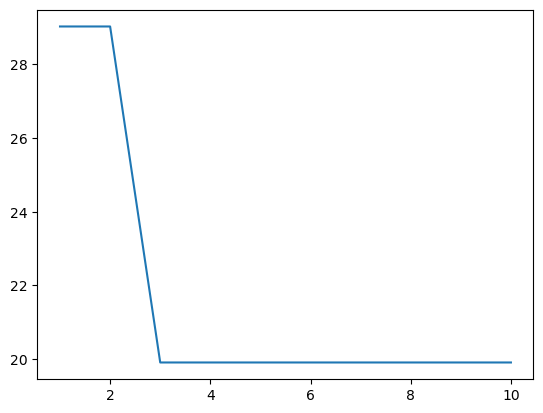

In [32]:
df['min_loss'] = df.groupby('iter')['loss_estimate'].transform(lambda x: df.loc[df['iter'] <= x.name, 'loss_estimate'].min())

df_plot = df.query('iter>0')
import numpy as np
import matplotlib.pyplot as plt

x = df_plot['iter']
y = df_plot['min_loss']

plt.plot(x, y)
#plt.legend(title='Parameter where:')
plt.show()

In [33]:
df_min_10=df.nsmallest(10,'loss_estimate')

Below is the x1, x2, x3 values of the lowest 10 loss_estimate and their iteration

In [34]:
#df.to_csv('../data/vanilla_bo.csv',index=None)
df_min_10

,x1,x2,x3,loss_estimate,iter,min_loss
32,43.164911,37.050944,36.832234,19.909338,3.0,19.909338
23,41.967423,48.238301,45.422072,29.031011,0.0,29.031011
29,37.373719,46.966174,39.838989,36.103731,0.0,29.031011
33,43.098808,38.578733,47.068904,53.565119,4.0,19.909338
18,37.784333,32.845675,43.977215,65.768785,0.0,29.031011
38,41.784474,34.886452,50.578210,69.752802,9.0,19.909338
0,48.546772,36.587424,48.575013,85.759990,0.0,29.031011
30,56.131174,36.144581,35.291021,103.533241,1.0,29.031011
35,41.466292,58.600375,42.293799,103.903227,6.0,19.909338
15,46.301146,43.210409,32.722920,114.652264,0.0,29.031011
